# Lab 10: Ultrasonic Rangefinder

In this lab, a circuit for an ultrasonic rangefinder was designed and built. This circuit works by emitting a 40kHz pulse for one millisecond at 20Hz, then reading it from the receiver. The time between emitting and receiving can be used to calculate the range.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

## Hardware Setup

![schematic](schematic/lab10-schematic.png)

There are two circuits in play. The top circuit is the emitter circuit and the bottom circuit is the receiver circuit.

### Emitter Circuit

The emitter circuit uses an AND gate to produce the 40kHz signal for specific intervals. The two signals being ANDed isa 40kHz @ 50% duty cycle signal and a 20Hz @ 2% duty cycle signal. This creates 40kHz pulses at 20Hz.

### Receiver Circuit

The receiver circuit uses two active band pass circuits to filter and amplify the feedback. The cutoff frequencies are set to 26kHz and 79kHz. The goal was to aim for 20kHz and 80kHz, half and double the actual frequency, respectively. 

![breadboard](img/circuit.jpg)

This being the last lab, I tried extra hard to make the circuit clean. The wires are all color coded for which part of the circuit it is part of, and the breadboard is labeled with the color code. Lastly, the trick that I learned from the previous labs is to keep all wires and components horizontal and let the breadboard's internal connections handle the vertical connections. Because I separated the top and bottom half of the breadboard to be the emitter and the receiver circuit, respectively, the only vertical wires that were needed were to pull power and ground, and nothing needed to bridge the center gap.

## Data

### Single Blip

![1ft](img/1ft.png)

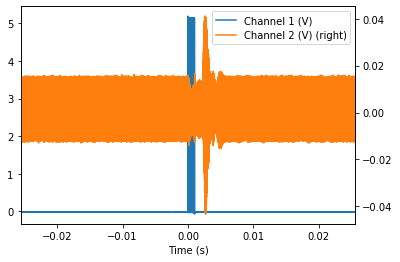

In [7]:
ft1 = pd.read_csv('data/1ft.csv')
ft1.plot(x='Time (s)', y=['Channel 1 (V)', 'Channel 2 (V)'], secondary_y='Channel 2 (V)')

While there is still a significant amount of noise on the signal, there is a clear spike when the pulse is received.

### Calibration Curve

| Distance (ft) | Time to return (ms) |
| ------------- | ------------------- |
| 1 | 2.264 |
| 2 | 4.239 |
| 3 | 5.588 |
| 4 | 7.755 |
| 5 | 9.875 |

Text(0.5, 1.0, 'Calibration curve')

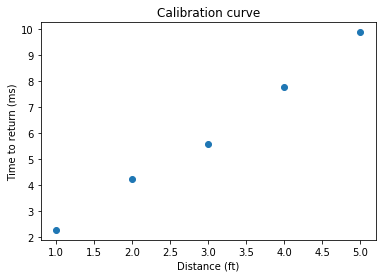

In [24]:
cal_data = {
    1: 2.264,
    2: 4.239,
    3: 5.588,
    4: 7.755,
    5: 9.875,
}

plt.plot(list(cal_data.keys()), list(cal_data.values()), 'o')
plt.xlabel('Distance (ft)')
plt.ylabel('Time to return (ms)')
plt.title('Calibration curve')

The data is vaguely linear, which is expected. This is because the rangefinder works by sending pulses of sound, which has a constant speed. A longer range is extra distance for the sound wave to travel, which is a linear function.